In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cityblock, euclidean, cosine


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Aminoacids

In [48]:
df_aa_eq_freq_all = pd.read_csv('./data/aminoacid_eq_freq_all_virus.csv')
df_aa_freq_all = pd.read_csv('./data/aminoacid_freq_all_virus.csv')

In [49]:
df_aa_eq_freq_sarscov2 = pd.read_csv('./data/aminoacid_eq_freq_sars_cov2.csv')

In [50]:
df_aa_eq_freq_sarscov2

,taxid,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,20A,0.002044,0.016945,0.003724,0.000872,0.453163,0.000782,0.009731,0.119522,0.005127,...,0.003392,0.021885,0.005341,0.002280,0.002916,0.058378,0.012011,0.020914,0.000577,0.099586
1,22C,0.004049,0.026409,0.007873,0.002634,0.352779,0.002638,0.012082,0.133302,0.010491,...,0.007062,0.031357,0.006213,0.004042,0.006683,0.061958,0.016124,0.035244,0.001773,0.105176


In [51]:
df_aa_eq_freq_all['taxid'] = df_aa_eq_freq_all['taxid'].astype(int)
# df_aa_eq_freq_sarscov2['taxid'] = df_aa_eq_freq_sarscov2['taxid'].astype(int)

In [52]:
df_aa_freq_all[~df_aa_freq_all['taxid'].isin(df_aa_eq_freq_all['taxid'])]

,refseq_id,taxid,M,A,S,N,H,V,T,L,...,I,G,C,Y,Q,R,P,K,W,X
18,GCF_009858895.2,2697049,0.022051,0.068344,0.067496,0.054067,0.018659,0.081419,0.075129,0.096473,...,0.051452,0.059368,0.030674,0.045445,0.036469,0.033995,0.039437,0.059227,0.011096,0.0


In [53]:
df_aa_eq_freq_all[~df_aa_eq_freq_all['taxid'].isin(df_aa_freq_all['taxid'])]

,taxid,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
3,11320,0.024011,0.018362,0.031522,0.0492,0.028642,0.030145,0.025108,0.105047,0.131746,...,0.020867,0.08441,0.019125,0.039188,0.073211,0.068976,0.064296,0.047022,0.007793,0.04917


In [54]:
df_type = pd.read_csv('../viral_spectra/data/viral_spectra_dataset.csv')

In [55]:
df_type.loc[0:30, 'taxid'] = df_type.loc[0:30, 'taxid'].astype(int)

In [56]:
df_type.head()

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,taxid,virusname
0,0.109127,0.117342,0.073464,0.060217,0.011690,0.149450,0.196651,0.026968,0.020779,0.036932,0.132424,0.064957,ds,Hepatitis B virus,nemu,10407,HBV
1,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu,10990,RBSDV
2,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,11082,WNV
3,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu,11983,norw
4,0.008840,0.102109,0.025178,0.031668,0.010016,0.490211,0.153864,0.018815,0.025828,0.020681,0.106414,0.006376,+,Hepatovirus A,nemu,12092,HAV


In [57]:
df_aa_eq_freq_all

,taxid,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,10407,0.061372,0.033074,0.026429,0.019082,0.047182,0.039924,0.040627,0.052203,0.021752,...,0.012721,0.030127,0.094344,0.029334,0.080454,0.113980,0.069961,0.056954,0.011159,0.037702
1,10990,0.013954,0.034301,0.013994,0.006222,0.211905,0.008021,0.024345,0.113975,0.015683,...,0.010919,0.035272,0.024275,0.010825,0.020176,0.100198,0.035170,0.049553,0.004332,0.086453
2,11082,0.049888,0.036130,0.034785,0.038470,0.041609,0.066067,0.026266,0.063355,0.042655,...,0.021009,0.038569,0.037670,0.029049,0.088358,0.092238,0.055315,0.076087,0.018948,0.040060
3,11320,0.024011,0.018362,0.031522,0.049200,0.028642,0.030145,0.025108,0.105047,0.131746,...,0.020867,0.084410,0.019125,0.039188,0.073211,0.068976,0.064296,0.047022,0.007793,0.049170
4,11983,0.052789,0.031740,0.028102,0.022459,0.048635,0.037268,0.039806,0.062872,0.030469,...,0.014603,0.038125,0.074775,0.031813,0.075248,0.108991,0.071618,0.057106,0.010764,0.043060
5,12092,0.017945,0.045204,0.027290,0.021375,0.127731,0.028527,0.017167,0.115193,0.036465,...,0.022321,0.046556,0.011288,0.013446,0.039320,0.077998,0.030613,0.080609,0.013085,0.077114
6,12110,0.093382,0.032256,0.027538,0.022514,0.025477,0.074226,0.034644,0.028912,0.015181,...,0.010621,0.018569,0.117480,0.028324,0.115896,0.101295,0.062968,0.058628,0.015751,0.021751
7,12162,0.063806,0.052981,0.026810,0.021218,0.064810,0.077587,0.022048,0.042720,0.013134,...,0.016032,0.016595,0.052473,0.017449,0.085024,0.104863,0.039497,0.094911,0.025899,0.032796
8,12637,0.044915,0.016347,0.036216,0.062491,0.013082,0.055676,0.029216,0.060956,0.110789,...,0.018035,0.064206,0.036234,0.050413,0.107406,0.072160,0.079629,0.044555,0.010173,0.028982
9,28295,0.023079,0.039043,0.016649,0.007837,0.167204,0.013408,0.028658,0.092988,0.014312,...,0.011876,0.030405,0.039726,0.013490,0.030917,0.115488,0.042148,0.057422,0.006503,0.071300


In [58]:
df_aa_freq_all

,refseq_id,taxid,M,A,S,N,H,V,T,L,...,I,G,C,Y,Q,R,P,K,W,X
0,GCF_000861825.2,10407,0.019324,0.053140,0.101888,0.032938,0.027229,0.051823,0.065876,0.127800,...,0.040843,0.064119,0.036451,0.027229,0.036451,0.063241,0.088713,0.022398,0.031181,0.000000
1,GCF_000852945.1,10990,0.024014,0.039141,0.090976,0.070771,0.024331,0.061991,0.056702,0.101132,...,0.070983,0.037554,0.015762,0.042526,0.032265,0.041680,0.034486,0.066222,0.007405,0.000000
2,GCF_000861085.1,11082,0.032028,0.081800,0.060593,0.037654,0.020558,0.078338,0.074659,0.087427,...,0.050422,0.088293,0.020342,0.024886,0.024670,0.057996,0.041117,0.056481,0.026401,0.000000
3,GCF_004789575.1,1133363,0.031650,0.049485,0.077367,0.056267,0.025119,0.048480,0.061291,0.088671,...,0.090681,0.041949,0.030394,0.044712,0.036925,0.040944,0.034665,0.074353,0.011052,0.000000
4,GCF_002829625.1,1157337,0.029342,0.072763,0.080526,0.044474,0.018553,0.076842,0.073947,0.094342,...,0.058947,0.061711,0.013421,0.031579,0.034868,0.053026,0.053421,0.042105,0.015132,0.000000
5,GCF_000853785.1,118655,0.028808,0.045341,0.078156,0.057615,0.025551,0.045591,0.056864,0.089930,...,0.088427,0.044339,0.027555,0.039078,0.033317,0.044589,0.031062,0.079659,0.011774,0.000000
6,GCF_000864005.1,11983,0.027262,0.077440,0.074279,0.041881,0.022521,0.068748,0.062821,0.081786,...,0.049388,0.083761,0.013038,0.024891,0.046227,0.052548,0.065192,0.048202,0.015804,0.000000
7,GCF_000860505.1,12092,0.032120,0.054358,0.076819,0.045597,0.023360,0.072776,0.059299,0.088050,...,0.063792,0.061995,0.019317,0.035040,0.040881,0.039533,0.043127,0.061096,0.016173,0.000000
8,GCF_002816555.1,12110,0.024014,0.085334,0.051887,0.046312,0.026587,0.079760,0.070326,0.083619,...,0.043739,0.067753,0.015009,0.035163,0.033448,0.046312,0.055746,0.060034,0.010292,0.000000
9,GCF_000862265.1,12162,0.019665,0.061412,0.100903,0.039491,0.019665,0.093972,0.054803,0.099130,...,0.043681,0.057382,0.023050,0.037556,0.018375,0.073017,0.037556,0.049645,0.006770,0.000000


In [59]:
df_aa_eq_freq_all.shape

(32, 21)

In [60]:
df_aa_freq_all.shape

(32, 23)

In [61]:
df_aa_eq_freq_filtered = df_aa_eq_freq_all.drop(3, axis=0)
df_aa_eq_freq_filtered = pd.concat([df_aa_eq_freq_filtered, df_aa_eq_freq_sarscov2])
df_aa_eq_freq_filtered['X'] = 0

df_aa_freq_filtered = df_aa_freq_all.drop(['refseq_id'], axis=1)

In [62]:
df_aa_eq_freq_filtered = df_aa_eq_freq_filtered.set_index('taxid')
df_aa_freq_filtered = df_aa_freq_filtered.set_index('taxid')

In [63]:
df_aa_eq_freq_filtered

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,X
taxid,,,,,,,,,,,,,,,,,,,,,
10407,0.061372,0.033074,0.026429,0.019082,0.047182,0.039924,0.040627,0.052203,0.021752,0.121619,...,0.030127,0.094344,0.029334,0.080454,0.113980,0.069961,0.056954,0.011159,0.037702,0
10990,0.013954,0.034301,0.013994,0.006222,0.211905,0.008021,0.024345,0.113975,0.015683,0.180426,...,0.035272,0.024275,0.010825,0.020176,0.100198,0.035170,0.049553,0.004332,0.086453,0
11082,0.049888,0.036130,0.034785,0.038470,0.041609,0.066067,0.026266,0.063355,0.042655,0.103472,...,0.038569,0.037670,0.029049,0.088358,0.092238,0.055315,0.076087,0.018948,0.040060,0
11983,0.052789,0.031740,0.028102,0.022459,0.048635,0.037268,0.039806,0.062872,0.030469,0.119759,...,0.038125,0.074775,0.031813,0.075248,0.108991,0.071618,0.057106,0.010764,0.043060,0
12092,0.017945,0.045204,0.027290,0.021375,0.127731,0.028527,0.017167,0.115193,0.036465,0.150753,...,0.046556,0.011288,0.013446,0.039320,0.077998,0.030613,0.080609,0.013085,0.077114,0
12110,0.093382,0.032256,0.027538,0.022514,0.025477,0.074226,0.034644,0.028912,0.015181,0.094587,...,0.018569,0.117480,0.028324,0.115896,0.101295,0.062968,0.058628,0.015751,0.021751,0
12162,0.063806,0.052981,0.026810,0.021218,0.064810,0.077587,0.022048,0.042720,0.013134,0.129347,...,0.016595,0.052473,0.017449,0.085024,0.104863,0.039497,0.094911,0.025899,0.032796,0
12637,0.044915,0.016347,0.036216,0.062491,0.013082,0.055676,0.029216,0.060956,0.110789,0.058518,...,0.064206,0.036234,0.050413,0.107406,0.072160,0.079629,0.044555,0.010173,0.028982,0
28295,0.023079,0.039043,0.016649,0.007837,0.167204,0.013408,0.028658,0.092988,0.014312,0.177547,...,0.030405,0.039726,0.013490,0.030917,0.115488,0.042148,0.057422,0.006503,0.071300,0


In [64]:
df_aa_freq_filtered

,M,A,S,N,H,V,T,L,F,D,...,I,G,C,Y,Q,R,P,K,W,X
taxid,,,,,,,,,,,,,,,,,,,,,
10407,0.019324,0.053140,0.101888,0.032938,0.027229,0.051823,0.065876,0.127800,0.056214,0.027229,...,0.040843,0.064119,0.036451,0.027229,0.036451,0.063241,0.088713,0.022398,0.031181,0.000000
10990,0.024014,0.039141,0.090976,0.070771,0.024331,0.061991,0.056702,0.101132,0.063260,0.062097,...,0.070983,0.037554,0.015762,0.042526,0.032265,0.041680,0.034486,0.066222,0.007405,0.000000
11082,0.032028,0.081800,0.060593,0.037654,0.020558,0.078338,0.074659,0.087427,0.031811,0.044579,...,0.050422,0.088293,0.020342,0.024886,0.024670,0.057996,0.041117,0.056481,0.026401,0.000000
1133363,0.031650,0.049485,0.077367,0.056267,0.025119,0.048480,0.061291,0.088671,0.045717,0.054760,...,0.090681,0.041949,0.030394,0.044712,0.036925,0.040944,0.034665,0.074353,0.011052,0.000000
1157337,0.029342,0.072763,0.080526,0.044474,0.018553,0.076842,0.073947,0.094342,0.039211,0.062368,...,0.058947,0.061711,0.013421,0.031579,0.034868,0.053026,0.053421,0.042105,0.015132,0.000000
118655,0.028808,0.045341,0.078156,0.057615,0.025551,0.045591,0.056864,0.089930,0.051854,0.056363,...,0.088427,0.044339,0.027555,0.039078,0.033317,0.044589,0.031062,0.079659,0.011774,0.000000
11983,0.027262,0.077440,0.074279,0.041881,0.022521,0.068748,0.062821,0.081786,0.036349,0.053339,...,0.049388,0.083761,0.013038,0.024891,0.046227,0.052548,0.065192,0.048202,0.015804,0.000000
12092,0.032120,0.054358,0.076819,0.045597,0.023360,0.072776,0.059299,0.088050,0.053908,0.058850,...,0.063792,0.061995,0.019317,0.035040,0.040881,0.039533,0.043127,0.061096,0.016173,0.000000
12110,0.024014,0.085334,0.051887,0.046312,0.026587,0.079760,0.070326,0.083619,0.047599,0.060034,...,0.043739,0.067753,0.015009,0.035163,0.033448,0.046312,0.055746,0.060034,0.010292,0.000000


## Observed frequency vs Equilibrium frequency

In [17]:
# for taxid in df_aa_eq_freq_all.index:
    
#     taxname = df_type[df_type['taxid'] == taxid]['taxname'].values[0]
#     type = df_type[df_type['taxid'] == taxid]['Type'].values[0]
    
#     fig, ax = plt.subplots(figsize=(10, 6))
    
#     # Значения первого набора данных
#     indices = np.arange(len(df_aa_eq_freq_all.columns))
#     bar_width = 0.35
#     bars1 = ax.bar(indices, df_aa_eq_freq_all.loc[taxid], bar_width, label='Equilibrium freq')
    
#     # Значения второго набора данных
#     bars2 = ax.bar(indices + bar_width, df_aa_freq_all.loc[taxid], bar_width, label='Observed freq')
    
#     ax.set_xlabel('Categories')
#     ax.set_ylabel('Values')
#     ax.set_title(f"Aminoacids freq for {taxname}, {type}")
#     ax.set_xticks(indices + bar_width / 2)
#     ax.set_xticklabels(df_aa_eq_freq_all.columns)
#     ax.legend()
    
#     plt.show()
#     # fig.savefig(f'../viral_spectra/figures/aa_freqs_plot_{taxid}.pdf')

In [65]:
# sort columns
df_aa_eq_freq_filtered = df_aa_eq_freq_filtered.reindex(sorted(df_aa_eq_freq_filtered.columns), axis=1)
df_aa_freq_filtered = df_aa_freq_filtered.reindex(sorted(df_aa_freq_filtered.columns), axis=1)

In [66]:
manhattan_distance = []
euclidean_distance = []
cosine_distance = []

for taxid in df_aa_eq_freq_filtered.loc[:3052763].index:
    manhattan_distance.append(cityblock(df_aa_eq_freq_filtered.loc[taxid], df_aa_freq_filtered.loc[taxid]))
    euclidean_distance.append(euclidean(df_aa_eq_freq_filtered.loc[taxid], df_aa_freq_filtered.loc[taxid]))
    cosine_distance.append(cosine(df_aa_eq_freq_filtered.loc[taxid], df_aa_freq_filtered.loc[taxid]))
    

In [67]:
# for sars_cov_2 clade 20A
manhattan_distance.append(cityblock(df_aa_eq_freq_filtered.loc['20A'], df_aa_freq_filtered.loc[2697049]))
euclidean_distance.append(euclidean(df_aa_eq_freq_filtered.loc['20A'], df_aa_freq_filtered.loc[2697049]))
cosine_distance.append(cosine(df_aa_eq_freq_filtered.loc['20A'], df_aa_freq_filtered.loc[2697049]))

# for sars_cov_2 clade 22C
manhattan_distance.append(cityblock(df_aa_eq_freq_filtered.loc['22C'], df_aa_freq_filtered.loc[2697049]))
euclidean_distance.append(euclidean(df_aa_eq_freq_filtered.loc['22C'], df_aa_freq_filtered.loc[2697049]))
cosine_distance.append(cosine(df_aa_eq_freq_filtered.loc['22C'], df_aa_freq_filtered.loc[2697049]))

In [68]:
df_aa_distance = pd.DataFrame([manhattan_distance, euclidean_distance, cosine_distance])\
                                .T\
                                .set_index(df_aa_eq_freq_filtered.index)\
                                .rename(columns={0:'manhat_d', 1:'euclid_d', 2:'cosine_d'})

In [69]:
df_aa_distance = df_aa_distance.join(df_type.set_index('taxid')[['Type', 'taxname']])

In [70]:
df_aa_distance

,manhat_d,euclid_d,cosine_d,Type,taxname
taxid,,,,,
10407,0.175231,0.047651,0.016462,ds,Hepatitis B virus
10990,0.685266,0.211182,0.211466,ds,Rice black streaked dwarf virus
11082,0.285491,0.076189,0.047849,+,West Nile virus
11983,0.387381,0.099673,0.078216,+,Norwalk virus
12092,0.531710,0.149558,0.146000,+,Hepatovirus A
12110,0.473956,0.135417,0.130172,+,Foot-and-mouth disease virus
12162,0.294759,0.084850,0.051585,+,Citrus tristeza virus
12637,0.352485,0.098965,0.077430,+,Dengue virus
28295,0.655672,0.190623,0.204129,+,Porcine epidemic diarrhea virus


In [71]:
df_aa_distance.loc['20A':'22C', 'Type'] = '+'
df_aa_distance.loc['20A', 'taxname'] = 'SARS-CoV-2 20A'
df_aa_distance.loc['22C', 'taxname'] = 'SARS-CoV-2 22C'

In [72]:
df_aa_distance

,manhat_d,euclid_d,cosine_d,Type,taxname
taxid,,,,,
10407,0.175231,0.047651,0.016462,ds,Hepatitis B virus
10990,0.685266,0.211182,0.211466,ds,Rice black streaked dwarf virus
11082,0.285491,0.076189,0.047849,+,West Nile virus
11983,0.387381,0.099673,0.078216,+,Norwalk virus
12092,0.531710,0.149558,0.146000,+,Hepatovirus A
12110,0.473956,0.135417,0.130172,+,Foot-and-mouth disease virus
12162,0.294759,0.084850,0.051585,+,Citrus tristeza virus
12637,0.352485,0.098965,0.077430,+,Dengue virus
28295,0.655672,0.190623,0.204129,+,Porcine epidemic diarrhea virus


## Distance between observed and equilibrium aa freqs

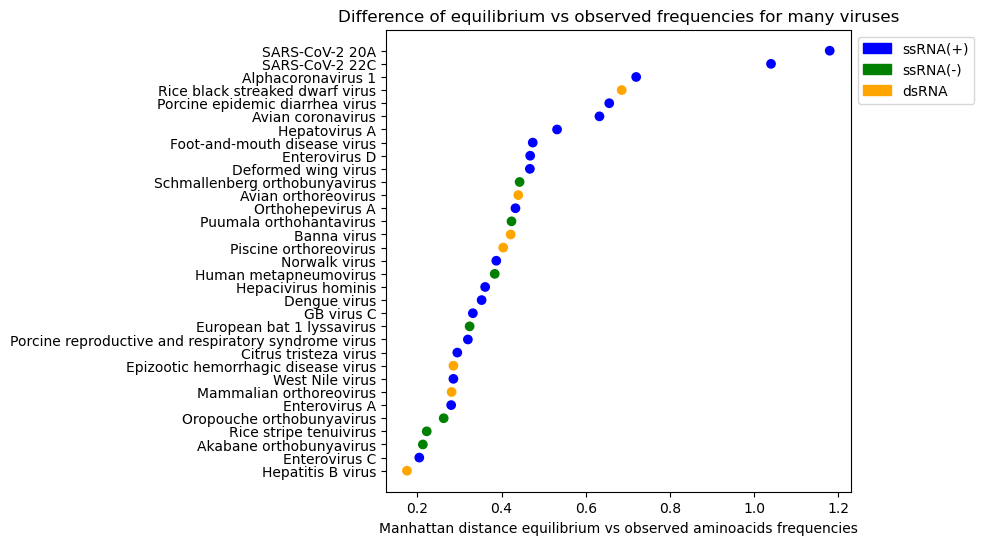

In [39]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_aa_distance.sort_values('manhat_d')['Type'] ]

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df_aa_distance['manhat_d'].sort_values(), range(len(df_aa_distance.index)), c=colors)
ax.set_yticks(range(len(df_aa_distance.index)))
ax.set_yticklabels(df_aa_distance.sort_values('manhat_d')['taxname'])
ax.set_xlabel('Manhattan distance equilibrium vs observed aminoacids frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

fig.savefig('../viral_spectra/figures/manhat_dist_aa_obs_eq_freq.pdf', bbox_inches='tight')

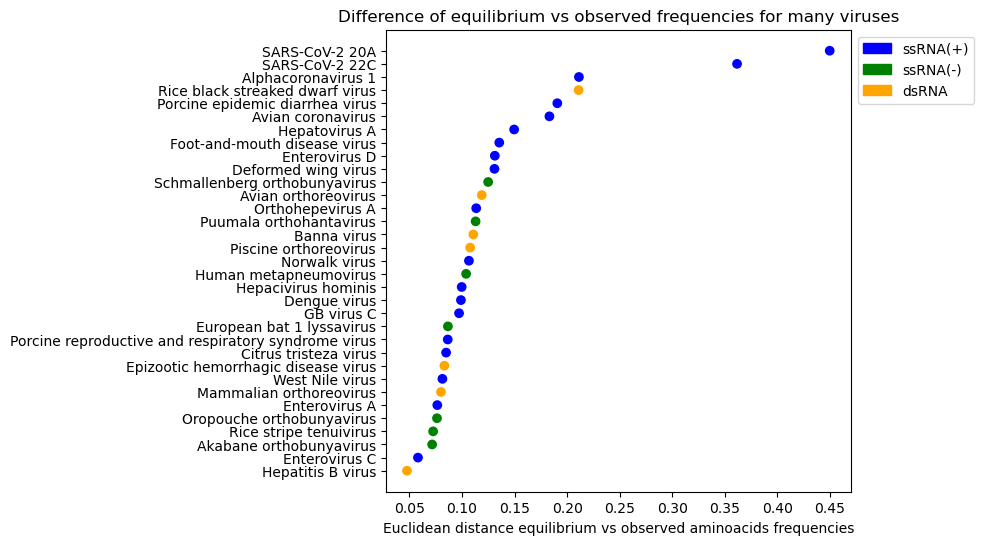

In [27]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_aa_distance.sort_values('manhat_d')['Type'] ]

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df_aa_distance['euclid_d'].sort_values(), range(len(df_aa_distance.index)), c=colors)
ax.set_yticks(range(len(df_aa_distance.index)))
ax.set_yticklabels(df_aa_distance.sort_values('manhat_d')['taxname'])
ax.set_xlabel('Euclidean distance equilibrium vs observed aminoacids frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

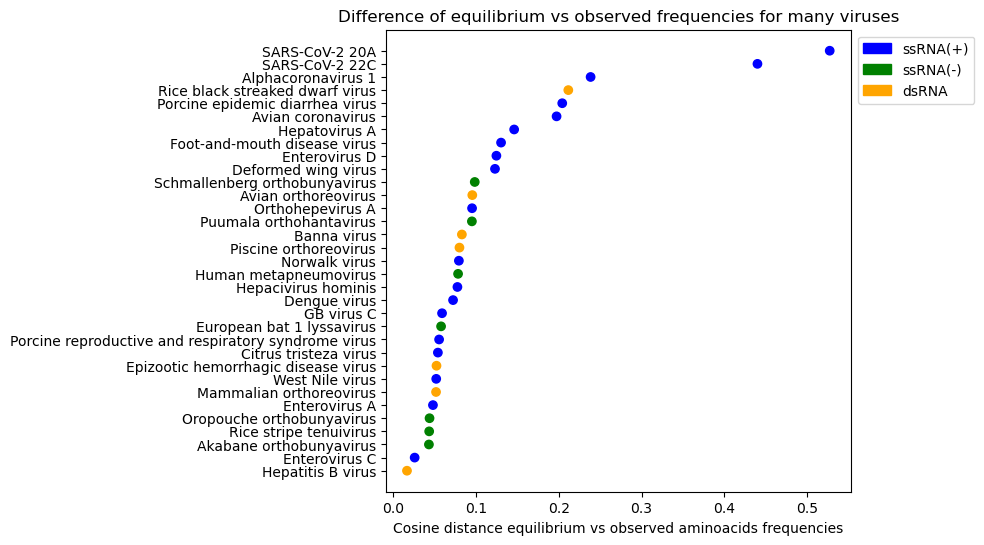

In [28]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_aa_distance.sort_values('manhat_d')['Type'] ]

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df_aa_distance['cosine_d'].sort_values(), range(len(df_aa_distance.index)), c=colors)
ax.set_yticks(range(len(df_aa_distance.index)))
ax.set_yticklabels(df_aa_distance.sort_values('manhat_d')['taxname'])
ax.set_xlabel('Cosine distance equilibrium vs observed aminoacids frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

In [29]:
df_aa_distance['manhat_d'].sort_values()

taxid
10407      0.175231
138950     0.204493
1933178    0.212929
3052763    0.222129
118655     0.262442
138948     0.280188
351073     0.281168
11082      0.285491
40054      0.285562
12162      0.294759
28344      0.319882
57482      0.324043
54290      0.331696
12637      0.352485
3052230    0.360933
162145     0.383629
11983      0.387381
1157337    0.403778
77763      0.421484
3052493    0.423506
1678143    0.432910
38170      0.439609
1133363    0.442788
198112     0.467112
138951     0.467881
12110      0.473956
12092      0.531710
694014     0.632420
28295      0.655672
10990      0.685266
693997     0.719621
22C        1.039915
20A        1.179347
Name: manhat_d, dtype: float64

In [30]:
df_aa_freq_all.set_index('taxid').join(df_type.set_index('taxid')[['Type', 'taxname']])[['refseq_id', 'Type', 'taxname']]

,refseq_id,Type,taxname
taxid,,,
10407,GCF_000861825.2,ds,Hepatitis B virus
10990,GCF_000852945.1,ds,Rice black streaked dwarf virus
11082,GCF_000861085.1,+,West Nile virus
1133363,GCF_004789575.1,-,Schmallenberg orthobunyavirus
1157337,GCF_002829625.1,ds,Piscine orthoreovirus
118655,GCF_000853785.1,-,Oropouche orthobunyavirus
11983,GCF_000864005.1,+,Norwalk virus
12092,GCF_000860505.1,+,Hepatovirus A
12110,GCF_002816555.1,+,Foot-and-mouth disease virus


# Nucleotids

In [24]:
df_nucl_eq_freq_all = pd.read_csv('./data/nucl_eq_freq_all_virus.csv')
df_nucl_all_freq_all = pd.read_csv('./data/nucl_all_freq_all_virus.csv')
df_nucl_4f_freq_all = pd.read_csv('./data/nucl_4f_freq_all_virus.csv')
df_nucl_eq_freq_sars = pd.read_csv('./data/nucl_eq_freq_sars_cov2.csv')

In [25]:
df_nucl_all_freq_all = df_nucl_all_freq_all.set_index('taxid').drop('refseq_id', axis=1)
df_nucl_all_freq_all

,A,T,G,C
taxid,,,,
10407,0.215849,0.289113,0.217893,0.277145
10990,0.326573,0.333791,0.172353,0.167283
11082,0.272406,0.218329,0.281491,0.227774
1133363,0.351568,0.289000,0.187704,0.171727
1157337,0.256296,0.271318,0.231726,0.240660
118655,0.360110,0.283116,0.190774,0.165999
11983,0.275454,0.242568,0.246514,0.235464
12092,0.302275,0.327421,0.216060,0.154243
12110,0.253751,0.212030,0.256179,0.278040


In [26]:
df_nucl_4f_freq_all = df_nucl_4f_freq_all.set_index('taxid').drop('refseq_id', axis=1)
df_nucl_4f_freq_all

,A,T,G,C
taxid,,,,
10407,0.245882,0.312941,0.187059,0.254118
10990,0.253731,0.484682,0.107227,0.154360
11082,0.277471,0.224285,0.237331,0.260913
1133363,0.416065,0.308664,0.130866,0.144404
1157337,0.205796,0.384565,0.191794,0.217844
118655,0.425891,0.304878,0.121951,0.147280
11983,0.261905,0.298095,0.165714,0.274286
12092,0.309091,0.468531,0.118881,0.103497
12110,0.182828,0.244444,0.240404,0.332323


In [27]:
df_nucl_eq_freq_all = df_nucl_eq_freq_all.pivot(columns='nucl', index='taxid', values='freq')
df_nucl_eq_freq_all

nucl,A,C,G,T
taxid,,,,
10407,0.223353,0.301198,0.195935,0.279514
10990,0.220359,0.152095,0.087429,0.540117
11082,0.276123,0.188044,0.249031,0.286801
11320,0.443771,0.132001,0.165724,0.258504
11983,0.255713,0.266986,0.188484,0.288817
12092,0.276907,0.102107,0.162320,0.458665
12110,0.181158,0.337987,0.268657,0.212198
12162,0.168913,0.224408,0.272875,0.333804
12637,0.404779,0.184190,0.228318,0.182714


In [28]:
df_nucl_eq_freq_sars = df_nucl_eq_freq_sars.pivot(columns='nucl', index='taxid', values='freq')
df_nucl_eq_freq_sars

nucl,A,C,G,T
taxid,,,,
20A,0.162199,0.072122,0.027598,0.738081
22C,0.200377,0.077208,0.050313,0.672101


In [32]:
df_nucl_eq_freq_filtered = df_nucl_eq_freq_all.drop(11320, axis=0)
df_nucl_eq_freq_filtered = pd.concat([df_nucl_eq_freq_filtered, df_nucl_eq_freq_sars])

In [33]:
df_nucl_eq_freq_filtered

nucl,A,C,G,T
taxid,,,,
10407,0.223353,0.301198,0.195935,0.279514
10990,0.220359,0.152095,0.087429,0.540117
11082,0.276123,0.188044,0.249031,0.286801
11983,0.255713,0.266986,0.188484,0.288817
12092,0.276907,0.102107,0.162320,0.458665
12110,0.181158,0.337987,0.268657,0.212198
12162,0.168913,0.224408,0.272875,0.333804
12637,0.404779,0.184190,0.228318,0.182714
28295,0.206817,0.194934,0.113250,0.484999


In [35]:
# sort columns
df_nucl_eq_freq_filtered = df_nucl_eq_freq_filtered.reindex(sorted(df_nucl_eq_freq_filtered.columns), axis=1)
df_nucl_all_freq_all = df_nucl_all_freq_all.reindex(sorted(df_nucl_all_freq_all.columns), axis=1)
df_nucl_4f_freq_all = df_nucl_4f_freq_all.reindex(sorted(df_nucl_4f_freq_all.columns), axis=1)

In [39]:
#all nucleotids positions
manhattan_distance_nucl_all = []

for taxid in df_nucl_eq_freq_filtered.loc[:3052763].index:
    manhattan_distance_nucl_all.append(cityblock(df_nucl_eq_freq_filtered.loc[taxid], df_nucl_all_freq_all.loc[taxid]))
# for sars_cov_2 clade 20A and 22C
manhattan_distance_nucl_all.append(cityblock(df_nucl_eq_freq_filtered.loc['20A'], df_nucl_all_freq_all.loc[2697049]))
manhattan_distance_nucl_all.append(cityblock(df_nucl_eq_freq_filtered.loc['22C'], df_nucl_all_freq_all.loc[2697049]))

In [40]:
#4f positions
manhattan_distance_nucl_4f = []

for taxid in df_nucl_eq_freq_filtered.loc[:3052763].index:
    manhattan_distance_nucl_4f.append(cityblock(df_nucl_eq_freq_filtered.loc[taxid], df_nucl_4f_freq_all.loc[taxid]))
# for sars_cov_2 clade 20A and 22C
manhattan_distance_nucl_4f.append(cityblock(df_nucl_eq_freq_filtered.loc['20A'], df_nucl_4f_freq_all.loc[2697049]))
manhattan_distance_nucl_4f.append(cityblock(df_nucl_eq_freq_filtered.loc['22C'], df_nucl_4f_freq_all.loc[2697049]))

In [46]:
df_nucl_distance = pd.DataFrame([manhattan_distance_nucl_all, manhattan_distance_nucl_4f])\
                                .T\
                                .set_index(df_nucl_eq_freq_filtered.index)\
                                .rename(columns={0:'manhat_d_nucl_all', 1:'manhat_d_nucl_4f'})

In [73]:
df_nucl_distance = df_nucl_distance.join(df_type.set_index('taxid')[['Type', 'taxname']])

In [74]:
df_nucl_distance

,manhat_d_nucl_all,manhat_d_nucl_4f,Type,taxname
taxid,,,,
10407,0.063113,0.111913,ds,Hepatitis B virus
10990,0.412653,0.110871,ds,Rice black streaked dwarf virus
11082,0.144379,0.148433,+,West Nile virus
11983,0.155541,0.045540,+,Norwalk virus
12092,0.262489,0.086878,+,Hepatovirus A
12110,0.145185,0.067834,+,Foot-and-mouth disease virus
12162,0.145413,0.173079,+,Citrus tristeza virus
12637,0.146232,0.080709,+,Dengue virus
28295,0.311747,0.046442,+,Porcine epidemic diarrhea virus


In [75]:
df_nucl_distance.loc['20A':'22C', 'Type'] = '+'
df_nucl_distance.loc['20A', 'taxname'] = 'SARS-CoV-2 20A'
df_nucl_distance.loc['22C', 'taxname'] = 'SARS-CoV-2 22C'

In [76]:
df_nucl_distance

,manhat_d_nucl_all,manhat_d_nucl_4f,Type,taxname
taxid,,,,
10407,0.063113,0.111913,ds,Hepatitis B virus
10990,0.412653,0.110871,ds,Rice black streaked dwarf virus
11082,0.144379,0.148433,+,West Nile virus
11983,0.155541,0.045540,+,Norwalk virus
12092,0.262489,0.086878,+,Hepatovirus A
12110,0.145185,0.067834,+,Foot-and-mouth disease virus
12162,0.145413,0.173079,+,Citrus tristeza virus
12637,0.146232,0.080709,+,Dengue virus
28295,0.311747,0.046442,+,Porcine epidemic diarrhea virus


## Distance between nucleotids and aminoacids

In [91]:
df_distance = df_aa_distance.merge(df_nucl_distance).set_index(df_nucl_distance.index)
df_distance

,manhat_d,euclid_d,cosine_d,Type,taxname,manhat_d_nucl_all,manhat_d_nucl_4f
taxid,,,,,,,
10407,0.175231,0.047651,0.016462,ds,Hepatitis B virus,0.063113,0.111913
10990,0.685266,0.211182,0.211466,ds,Rice black streaked dwarf virus,0.412653,0.110871
11082,0.285491,0.076189,0.047849,+,West Nile virus,0.144379,0.148433
11983,0.387381,0.099673,0.078216,+,Norwalk virus,0.155541,0.045540
12092,0.531710,0.149558,0.146000,+,Hepatovirus A,0.262489,0.086878
12110,0.473956,0.135417,0.130172,+,Foot-and-mouth disease virus,0.145185,0.067834
12162,0.294759,0.084850,0.051585,+,Citrus tristeza virus,0.145413,0.173079
12637,0.352485,0.098965,0.077430,+,Dengue virus,0.146232,0.080709
28295,0.655672,0.190623,0.204129,+,Porcine epidemic diarrhea virus,0.311747,0.046442


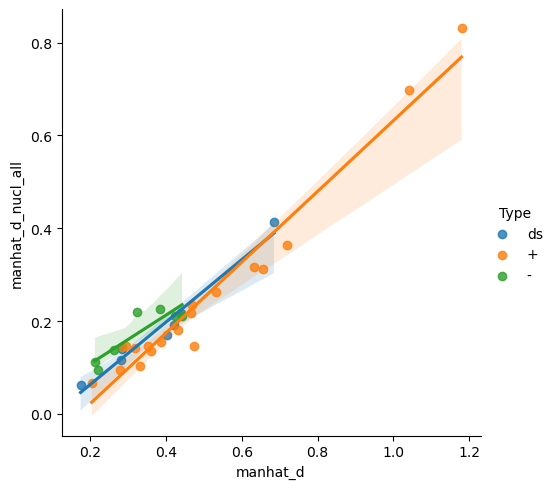

In [92]:
sns.lmplot(df_distance, x='manhat_d', y='manhat_d_nucl_all', hue='Type')

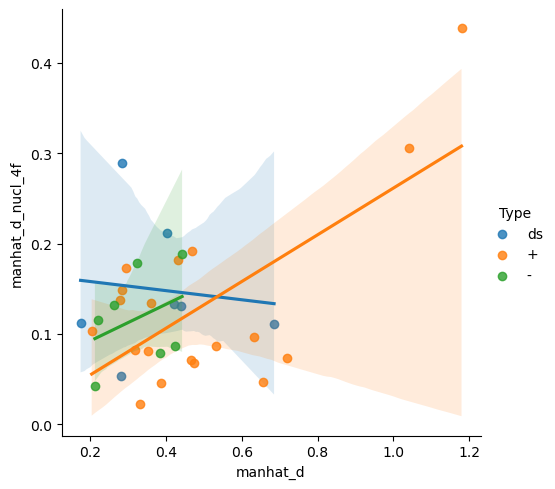

In [96]:
sns.lmplot(df_distance, x='manhat_d', y='manhat_d_nucl_4f', hue='Type')

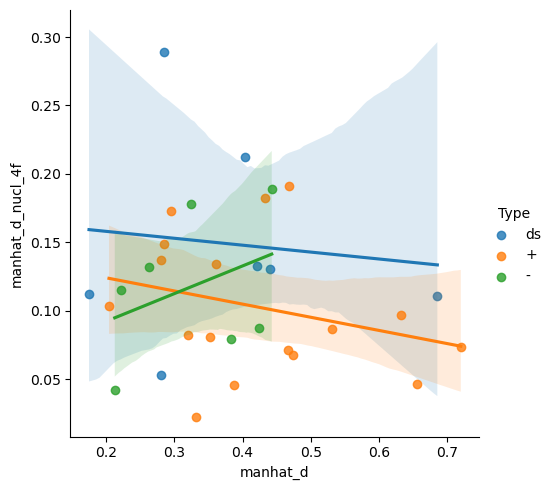

In [97]:
sns.lmplot(df_distance.query('manhat_d < 0.8'), x='manhat_d', y='manhat_d_nucl_4f', hue='Type')

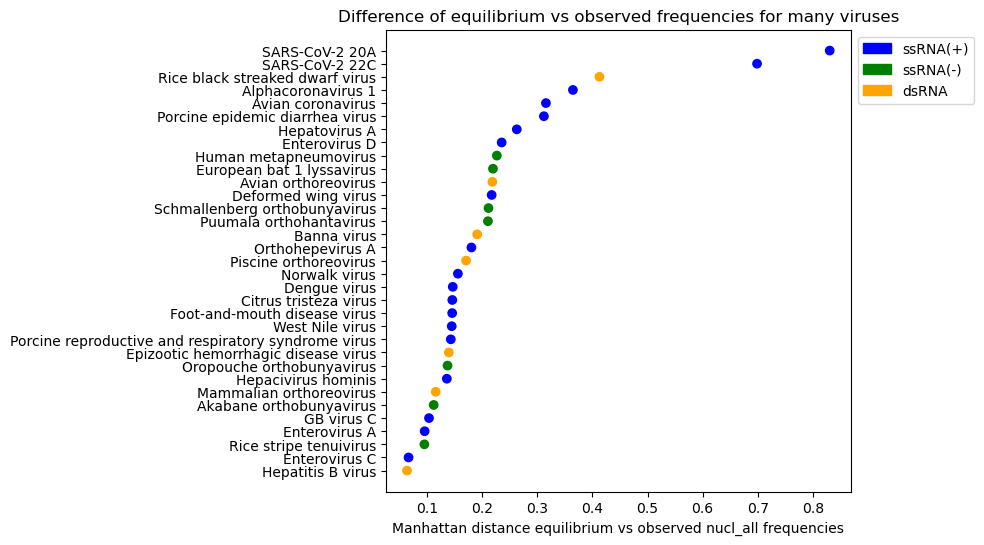

In [94]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_nucl_distance.sort_values('manhat_d_nucl_all')['Type'] ]

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df_nucl_distance['manhat_d_nucl_all'].sort_values(), range(len(df_nucl_distance.index)), c=colors)
ax.set_yticks(range(len(df_nucl_distance.index)))
ax.set_yticklabels(df_nucl_distance.sort_values('manhat_d_nucl_all')['taxname'])
ax.set_xlabel('Manhattan distance equilibrium vs observed nucl_all frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

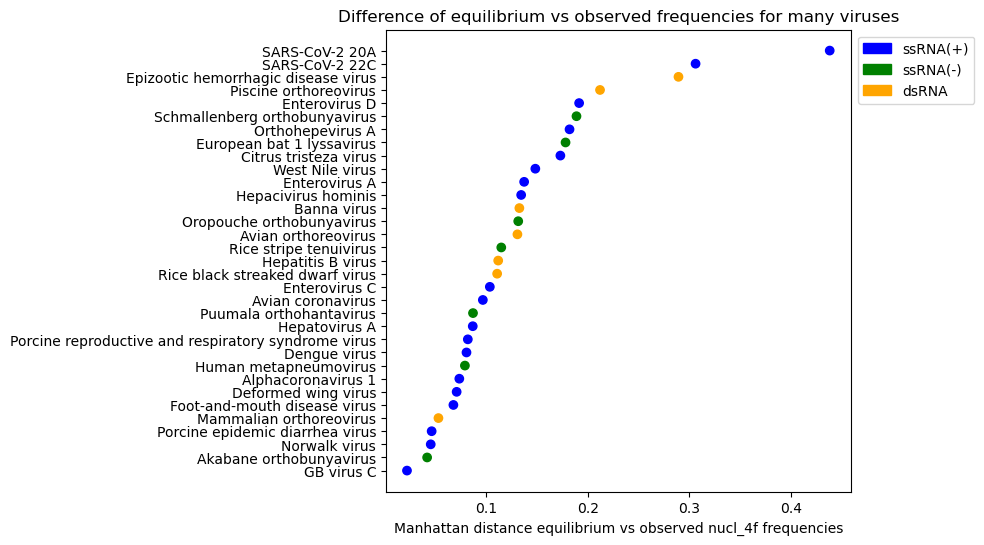

In [95]:
colors = ['blue' if type == '+' else 'green' if type == '-' else 'orange' for type in df_nucl_distance.sort_values('manhat_d_nucl_4f')['Type'] ]

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df_nucl_distance['manhat_d_nucl_4f'].sort_values(), range(len(df_nucl_distance.index)), c=colors)
ax.set_yticks(range(len(df_nucl_distance.index)))
ax.set_yticklabels(df_nucl_distance.sort_values('manhat_d_nucl_4f')['taxname'])
ax.set_xlabel('Manhattan distance equilibrium vs observed nucl_4f frequencies')
ax.set_title('Difference of equilibrium vs observed frequencies for many viruses')

legend_labels = {'blue': 'ssRNA(+)', 'green': 'ssRNA(-)', 'orange': 'dsRNA'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
ax.legend(handles=patches, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()